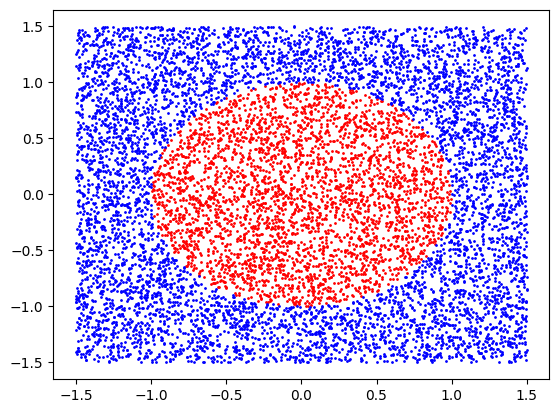

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
number=10000
x=3*np.random.rand(number , 2)-1.5
y = np.zeros((number,))
x , y = Mixer(x , y)
for i in range(y.shape[0]) : 
    if x[i,0]**2 + x[i,1]**2 < 1 : 
        y[i]=1
x_ones= x[y==1 , : ]
x_zeros=x[y==0, :]
plt.scatter(x_ones[: , 0] , x_ones[: , 1] ,s = 1 ,  color='red')
plt.scatter(x_zeros[:, 0] , x_zeros[:,1], s=1, color='blue')
plt.show()


In [5]:
def Mixer(x,y) : 
    n= x.shape[0]
    ind=list(range(n))
    np.random.shuffle(ind)
    x=x[ind , :]
    y=y[ind]
    return x , y 


In [6]:
def sigmoid(x) : 
    return 1/(1+np.exp(-x))
class neoron : 
    def __init__ (self , input_dim) : 
        self.weights = np.random.randn( input_dim , 1)
        self.bias = np.random.randn(1)      
    def learn(self, epochs, X , y, learning_rate) :
        y = y.reshape(-1 , 1)
        loss = np.zeros((epochs,))
        for i in range(epochs) :
            #forward : 
            y_pred = sigmoid(X @ self.weights + self.bias)
            loss[i]= np.sum(-y*np.log(y_pred)-(1-y)*np.log(1-y_pred))/np.size(y_pred)
            #update :
            dz= y_pred - y
            self.bias= self.bias - learning_rate*np.sum(dz)/np.size(dz)
            dw = np.sum(X*dz , axis=0)/np.size(dz)
            self.weights= self.weights - learning_rate*dw.reshape(-1 , 1)
        plt.plot(range(epochs) , loss, color='red')
        plt.show()
    
    def predict(self, x) : 
        return sigmoid(x.T @ self.weights + self.bias)
    

(10000, 2)


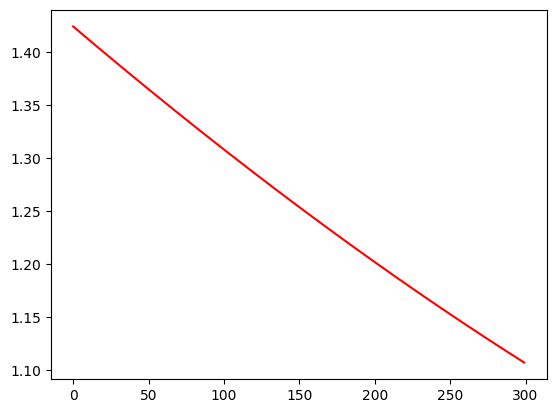

In [7]:
print(x.shape)
n1=neoron(2) 
n1.learn(epochs=300 , X=x , y=y , learning_rate=0.01)



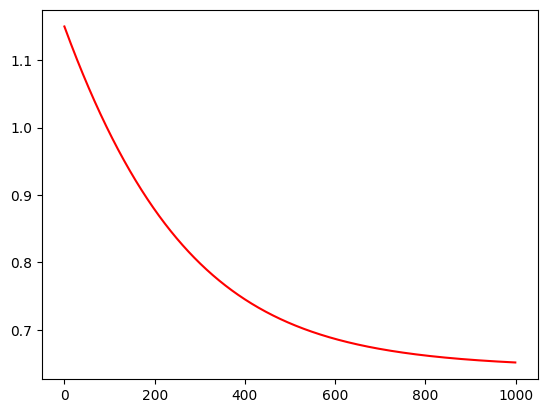

In [8]:
z1 = x[: , 0]
z2 = x[: , 1]
new_x3 = np.vstack([z1 , z2 , z1*z2])
new_x3=new_x3.T
n3 = neoron(3)
n3.learn( epochs=1000 ,X=new_x3 , y=y , learning_rate=0.01)

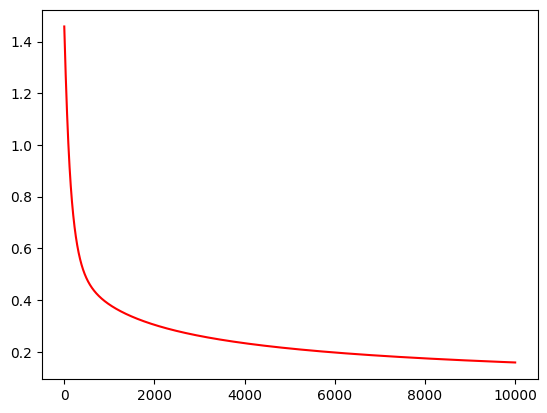

In [9]:
z1 = x[: , 0]
z2 = x[: , 1]
new_x14 = np.vstack([z1 , z2 , z1*z2 , z1**2 , z2**2 , z1**3 , z2**3 , z1*z2**2 ,z2*z1**2 ,
                   z1**4 , z1**3*z2 , z1**2*z2**2 , z1*z2**3 , z2**4 ])
new_x14=new_x14.T
n14 = neoron(14)
n14.learn( epochs=10000 ,X=new_x14 , y=y , learning_rate=0.005)

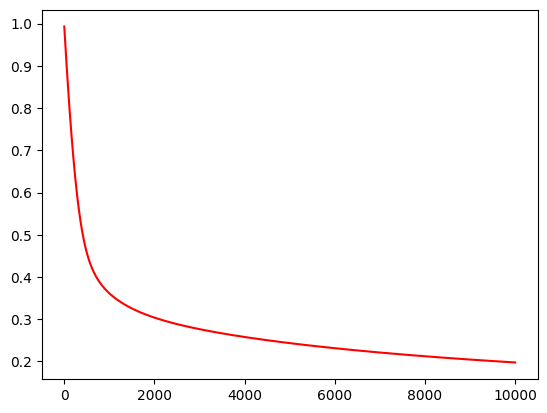

In [10]:
z1 = x[: , 0]
z2 = x[: , 1]
new_x9 = np.vstack([z1 , z2 , z1*z2 , z1**2 , z2**2 , z1**3 , z2**3 , z1*z2**2 ,z2*z1**2  ])
new_x9=new_x9.T
n9 = neoron(9)
n9.learn( epochs=10000 ,X=new_x9 , y=y , learning_rate=0.005)

In [11]:
z1 , z2 = 0.3 , 0.4
##
Z = np.array([z1 , z2])
Z= Z.reshape(-1 , 1)
##
sample_x3 = np.array([z1 , z2 , z1*z2  ])
sample_x3= sample_x3.reshape(-1 , 1)
##
sample_x9 = np.array([z1 , z2 , z1*z2 , z1**2 , z2**2 , z1**3 , z2**3 , z1*z2**2 ,z2*z1**2  ])
sample_x9= sample_x9.reshape(-1 , 1)
print(n1.predict(Z))
print(n3.predict(sample_x3))
print(n9.predict(sample_x9))


[[0.19429043]]
[[0.38440124]]
[[0.81526581]]


(10000,)


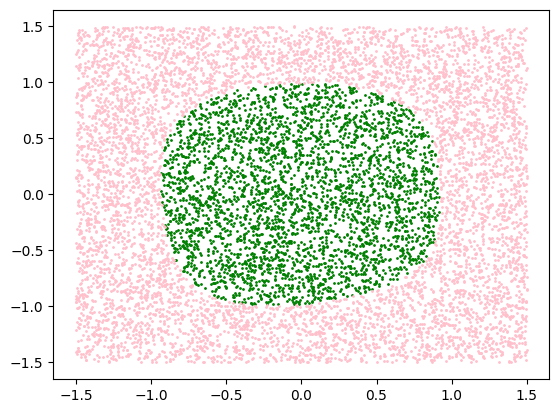

In [12]:
y_p  = [] 
for i in range(x.shape[0]) : 
    z1 , z2 = x[i , : ]
    sample_x9 = new_x14 = np.vstack([z1 , z2 , z1*z2 , z1**2 , z2**2 , z1**3 , z2**3 , z1*z2**2 ,z2*z1**2 ,
                   z1**4 , z1**3*z2 , z1**2*z2**2 , z1*z2**3 , z2**4 ])
    sample_x9= sample_x9.reshape(-1 , 1)
    if n14.predict(sample_x9) > 0.5 : 
        y_p.append(1)
    else:
        y_p.append(0)
y_p= np.array(y_p)
print(y_p.shape)
x_ones= x[y_p==1 , : ]
x_zeros=x[y_p==0, :]
plt.scatter(x_ones[: , 0] , x_ones[: , 1] ,s = 1 ,  color='green')
plt.scatter(x_zeros[:, 0] , x_zeros[:,1], s=1, color='pink')
plt.show()


